Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from glob import glob
from skimage import io

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [5]:
!unzip gdrive/MyDrive/Deep_Learning/CNN_assignment.zip

Archive:  gdrive/MyDrive/Deep_Learning/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  infl

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

# Printed the sizes if train and test sets

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Use 80% of the images for training, and 20% for validation.

In [9]:
## Written train dataset extraction code
## Used seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## made sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Written validation dataset here
## Used seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## made sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
train_ds.class_names # list of classes

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [12]:
# Listed out all the classes of skin cancer and stored them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [13]:
dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))

dataset1 = dataset.take(3)
print(list(dataset1.as_numpy_iterator()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2]


(32, 180, 180, 3)
(32,)
(180, 180, 3)


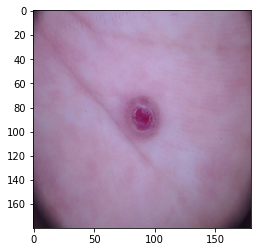

In [14]:
for images, labels in train_ds.take(1):
  print(images.shape)
  print(labels.shape)
  print(images[0].shape)
  plt.imshow(images[0].numpy().astype('uint8'))

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

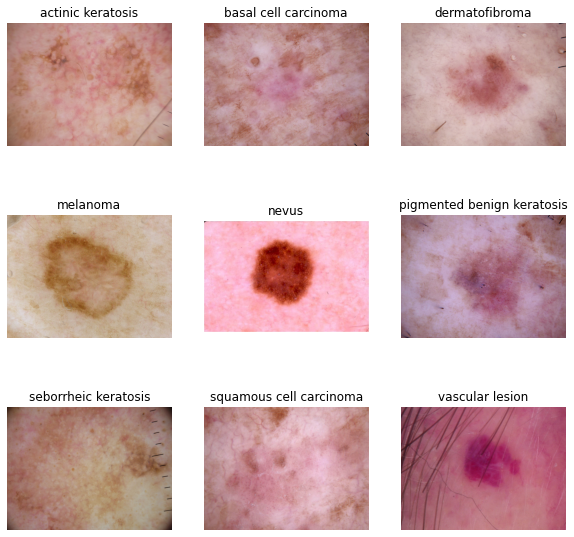

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from glob import glob
from skimage import io


### your code goes here, you can use training or validation data to visualize
main_path = "Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
class_paths = []
for classes in class_names:
    class_paths.append(glob("./" + main_path + classes + "/*.jpg"))

plt.figure(figsize = (10, 10))
count = list(range(9))
for i,j in zip(class_paths, count):
    ax = plt.subplot(3 , 3 ,j+1)
    plt.title(i[0][70:-17])
    plt.imshow(io.imread(i[0]))
    plt.axis("off")







`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
num_classes = 9

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)), 
                    layers.Conv2D(16, 3, padding = 'same', activation= 'relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32, 3, padding = 'same', activation= 'relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64, 3, padding = 'same', activation= 'relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation= 'relu'),
                    layers.Dense(num_classes)  
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics=['accuracy'])

# used adam optimiser and Sparse Categorical Cross Entropy as loss funchtin

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model


In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Trained the model using 20 epochs.

Epoch 1/20
56/56 [==============================] - 43s 65ms/step - loss: 1.9987 - accuracy: 0.2628 - val_loss: 1.7412 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 1s 20ms/step - loss: 1.6849 - accuracy: 0.3912 - val_loss: 1.5907 - val_accuracy: 0.4631
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.5167 - accuracy: 0.4682 - val_loss: 1.5030 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3932 - accuracy: 0.5195 - val_loss: 1.3867 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2886 - accuracy: 0.5541 - val_loss: 1.3953 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2481 - accuracy: 0.5525 - val_loss: 1.4291 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1286 - accuracy: 0.5938 - val_loss: 1.3145 - val_accuracy: 0.5526
Epoch 8/20
5

**`Inference:`** The model clearly overfits since the difference in training and test accuracies is high.

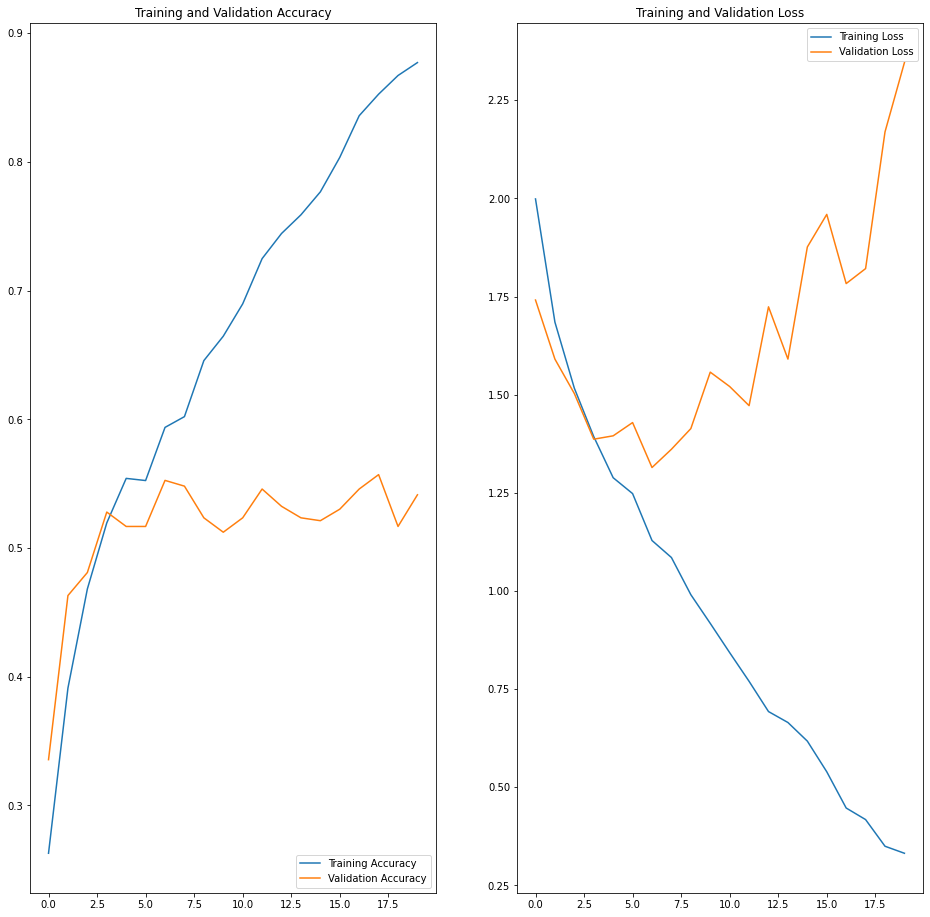

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16,16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# The graphs clearly say that loss component is also very high, which makes the model ineffective

## Create another Model with BN and without dropouts

> Indented block



In [22]:
### Your code goes here
num_classes = 9

# Normalizing the dataset 
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes, activation = 'softmax')

])

# Initialized another model by including batch normalization after every convolutional layer and without dropout at all

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [23]:
### Todo, choose a stocastic gradiend disscent optimiser and same loss function
model.compile(optimizer='sgd',
              loss= "sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [24]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 45, 32)       

In [25]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 24ms/step - loss: 1.8874 - accuracy: 0.3873 - val_loss: 2.3798 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3569 - accuracy: 0.5218 - val_loss: 2.7829 - val_accuracy: 0.1074
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.0469 - accuracy: 0.6306 - val_loss: 3.2180 - val_accuracy: 0.1566
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 0.8256 - accuracy: 0.7165 - val_loss: 3.2923 - val_accuracy: 0.1477
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 0.5909 - accuracy: 0.7852 - val_loss: 3.2004 - val_accuracy: 0.1655
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 0.4357 - accuracy: 0.8566 - val_loss: 2.5531 - val_accuracy: 0.2327
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 0.3056 - accuracy: 0.9074 - val_loss: 2.7757 - val_accuracy: 0.3490
Epoch 8/20
56

## The new model with BN and without droupouts is heavily over fitted

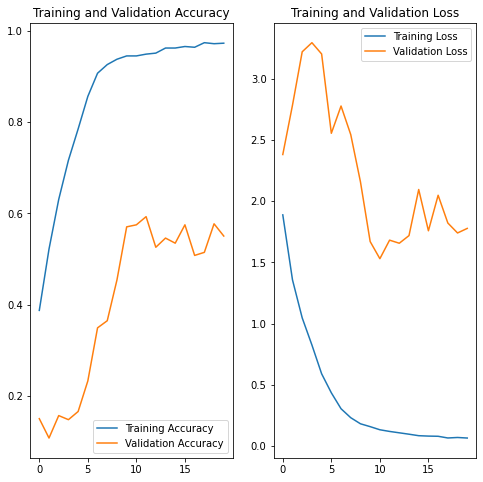

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

the loss is little bit improved to the first model, overfitting .

## Create another Model with BN and with dropouts


In [28]:
### Your code goes here
num_classes = 9

# Normalizing the dataset 
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Dropout(0.25),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Dropout(0.25),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Dropout(0.25),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes, activation = 'softmax')

])


In [29]:
### Todo, choose a stocastic gradiend disscent optimiser and same loss function
model.compile(optimizer='sgd',
              loss= "sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 90, 90, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)       

In [31]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 27ms/step - loss: 1.9961 - accuracy: 0.3583 - val_loss: 2.3681 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4176 - accuracy: 0.5039 - val_loss: 3.1239 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2153 - accuracy: 0.5485 - val_loss: 2.6939 - val_accuracy: 0.1588
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.0697 - accuracy: 0.6172 - val_loss: 3.7198 - val_accuracy: 0.1633
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 0.9722 - accuracy: 0.6473 - val_loss: 2.4515 - val_accuracy: 0.3154
Epoch 6/20
56/56 [==============================] - 1s 24ms/step - loss: 0.8870 - accuracy: 0.6752 - val_loss: 2.9197 - val_accuracy: 0.2685
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 0.7863 - accuracy: 0.7148 - val_loss: 3.1141 - val_accuracy: 0.2931
Epoch 8/20
56

Even this model is overfitting


In [32]:
!pip install Augmentor

In [33]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.2),
])

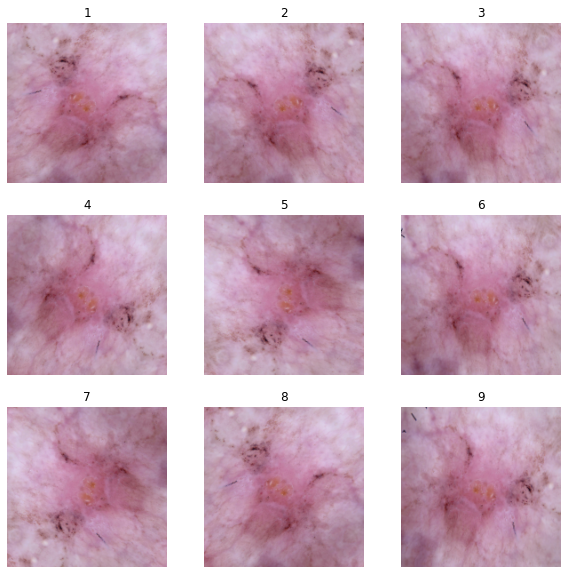

In [34]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=[10,10])
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.title(i + 1)
        plt.axis("off")

In [ ]:
### Todo:
### Create the model, compile and train the model


### Todo:
### Create the model, compile and train the model


In [35]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
num_classes = 9


## Your code goes here

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.Dropout(0.2),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.Dropout(0.2),
                    layers.MaxPool2D(),
                    layers.BatchNormalization(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dropout(0.2),
                    layers.Dense(num_classes, activation = 'softmax')
])

In [36]:
## Your code goes here

model.compile(optimizer='adam',
              loss= "sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [37]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 29ms/step - loss: 6.0815 - accuracy: 0.2589 - val_loss: 2.3460 - val_accuracy: 0.0671
Epoch 2/20
56/56 [==============================] - 1s 26ms/step - loss: 2.0712 - accuracy: 0.3019 - val_loss: 3.1417 - val_accuracy: 0.1477
Epoch 3/20
56/56 [==============================] - 1s 26ms/step - loss: 1.9220 - accuracy: 0.3410 - val_loss: 3.4753 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.8510 - accuracy: 0.3711 - val_loss: 4.5783 - val_accuracy: 0.1588
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.7982 - accuracy: 0.3616 - val_loss: 4.3994 - val_accuracy: 0.1655
Epoch 6/20
56/56 [==============================] - 1s 27ms/step - loss: 1.8228 - accuracy: 0.3421 - val_loss: 3.1094 - val_accuracy: 0.2953
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 1.8036 - accuracy: 0.3655 - val_loss: 3.2124 - val_accuracy: 0.2125
Epoch 8/20
56

From this we found both the training and testing accuracies are poor.

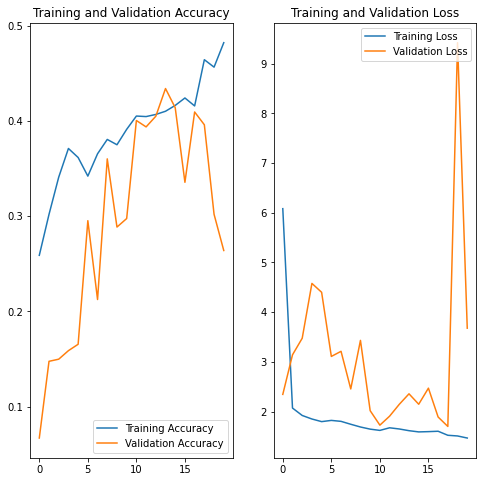

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- The model is underfitting

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


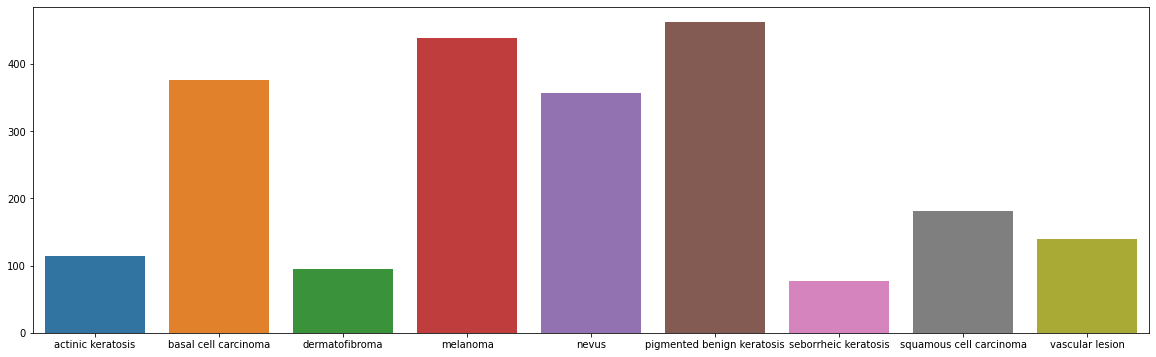

In [39]:
## Your code goes here.
import seaborn as sns 

classes = class_names
class_lens = []
for i in class_paths:
    class_lens.append(len(i))
    
plt.figure(figsize = (20,6))
sns.barplot(classes, class_lens)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
**`'seborrheic keratosis'`**
#### - Which classes dominate the data in terms proportionate number of samples?
**`'pigmented benign keratosis'`**, **`'melanoma'`** 'basal cell carcinoma', 'nevus' in the descending order



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.

In [40]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD045B74450>: 100%|██████████| 500/500 [00:15<00:00, 31.53 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD044642E50>:   0%|          | 1/500 [00:00<01:10,  7.10 Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD0441FC2D0>: 100%|██████████| 500/500 [00:15<00:00, 31.37 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD045D9CFD0>:   0%|          | 2/500 [00:00<00:27, 18.36 Samples/s]                  

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD0458FE750>: 100%|██████████| 500/500 [00:16<00:00, 30.53 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD0443A60D0>:   0%|          | 1/500 [00:00<01:29,  5.58 Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD0443CD950>: 100%|██████████| 500/500 [01:22<00:00,  6.07 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD044712350>:   0%|          | 1/500 [00:00<01:11,  7.00 Samples/s]                  

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FD0442DB1D0>: 100%|██████████| 500/500 [01:18<00:00,  6.40 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD0447DFD50>:   0%|          | 1/500 [00:00<00:54,  9.18 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD044243A50>: 100%|██████████| 500/500 [00:16<00:00, 31.11 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD0447EAC10>: 100%|██████████| 500/500 [00:39<00:00, 12.81 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD044104310>: 100%|██████████| 500/500 [00:15<00:00, 32.13 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD045A56DD0>: 100%|██████████| 500/500 [00:16<00:00, 30.44 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [41]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train) 

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [42]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0031270.jpg_1ae853e3-f24e-40a5-aa9d-207067a4462a.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0029889.jpg_91b9e61c-ae75-4a27-aec9-31b44cc361cf.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0031215.jpg_a8fcc6bd-f63f-4408-9d21-5fb87fdbbc68.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032867.jpg_a79e798f-684c-4a11-814f-a16734bc6251.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025707.jpg_908b1542-dd43-4ea1-a65e-ba4f48280b73.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_o

In [43]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [44]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [45]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [46]:
new_df['Label'].value_counts()

squamous cell carcinoma       500
nevus                         500
melanoma                      500
basal cell carcinoma          500
seborrheic keratosis          500
actinic keratosis             500
pigmented benign keratosis    500
dermatofibroma                500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [48]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [50]:
## your code goes here

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.2),
                    layers.BatchNormalization(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dropout(0.2),
                    layers.Dense(num_classes, activation = 'softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [51]:
## your code goes here

model.compile(optimizer='sgd',
              loss= "sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds, 
                    epochs = epochs,
                    validation_data = val_ds)

Epoch 1/30
169/169 [==============================] - 25s 143ms/step - loss: 1.8513 - accuracy: 0.3272 - val_loss: 6.7431 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 24s 141ms/step - loss: 1.5349 - accuracy: 0.4227 - val_loss: 4.8396 - val_accuracy: 0.1952
Epoch 3/30
169/169 [==============================] - 25s 141ms/step - loss: 1.3673 - accuracy: 0.4900 - val_loss: 3.3505 - val_accuracy: 0.3029
Epoch 4/30
169/169 [==============================] - 25s 142ms/step - loss: 1.2360 - accuracy: 0.5325 - val_loss: 2.1550 - val_accuracy: 0.3756
Epoch 5/30
169/169 [==============================] - 25s 141ms/step - loss: 1.0868 - accuracy: 0.5920 - val_loss: 2.3254 - val_accuracy: 0.4514
Epoch 6/30
169/169 [==============================] - 25s 142ms/step - loss: 0.9607 - accuracy: 0.6419 - val_loss: 1.9581 - val_accuracy: 0.4439
Epoch 7/30
169/169 [==============================] - 25s 141ms/step - loss: 0.8316 - accuracy: 0.6864 - val_loss: 1.3422 - val_ac

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- Even though the model seems to be overfitting, there is significant improvement in the model performance compared to old models.
